> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (TMDb movie data
(cleaned from
original data on!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

# # questions :
# What  is the best month to publish the movie?
#  what is average runtime of films?!
# what is the profits and budget for each year and what is the realtion between than ?!
# Top 10 most profitable films?
# The relation betwen vote_average and popularity ?
# Relaction between Popularity and Profit?

In [212]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [213]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
data = pd.read_csv('E:\\tmdb-movies.csv')
data.columns
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.


Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [214]:
#shape of data
data.shape

(10866, 21)

In [215]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [216]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
#check for duplicated rows
data.duplicated().sum()
#remove duplicated
data=data.drop_duplicates()

In [217]:
data.isnull().sum().sum()

13433

In [218]:
#to know na in each column
data.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [219]:
df=data.drop(['id','imdb_id','original_title','cast','homepage','director','tagline','keywords','overview','genres','production_companies'], axis=1)
df.head(5)

,popularity,budget,revenue,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,120,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,119,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,136,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,137,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [220]:
df.isnull().sum().sum()

0

# check un logical values

In [221]:
def number_of_zeros_in_col(x):
    print(len(data[x == 0]))

In [222]:
number_of_zeros_in_col(data.runtime)

31


In [223]:
number_of_zeros_in_col(data.revenue)

6016


In [224]:
number_of_zeros_in_col(data.budget)

5696


In [225]:
number_of_zeros_in_col(data.budget_adj)

5696


In [226]:
number_of_zeros_in_col(data.revenue_adj)

6016


### take from :https://stackoverflow.com/questions/55319655/pandas-how-to-replace-zero-values-in-a-column-with-the-mean-of-that-column-for

In [227]:
List=['runtime','revenue','budget','budget_adj','revenue_adj']
for x in List:
    val = df[x].mean()
    df[x] = df[x].replace(0, int(val))

In [228]:
number_of_zeros_in_col(df.runtime)

0


In [229]:
print(df.dtypes)

popularity      float64
budget            int64
revenue           int64
runtime           int64
release_date     object
vote_count        int64
vote_average    float64
release_year      int64
budget_adj      float64
revenue_adj     float64
dtype: object


### type of release data is object i want to change to datetime
### #take from video:https://youtu.be/fNzUhp5uHFY

In [230]:
print(pd.DatetimeIndex(df['release_date']))

#desplite release data in to (year , month , day)
data_col=pd.DatetimeIndex(df['release_date'])
df['year']=data_col.year
df['month']=data_col.month
df['day']=data_col.day

DatetimeIndex(['2015-06-09', '2015-05-13', '2015-03-18', '2015-12-15',
               '2015-04-01', '2015-12-25', '2015-06-23', '2015-09-30',
               '2015-06-17', '2015-06-09',
               ...
               '2066-02-16', '2066-06-10', '2066-05-25', '2066-10-05',
               '2066-05-20', '2066-06-15', '2066-12-21', '2066-01-01',
               '2066-11-02', '2066-11-15'],
              dtype='datetime64[ns]', name='release_date', length=10865, freq=None)


In [231]:
df

,popularity,budget,revenue,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,year,month,day
0,32.985763,150000000,1513528810,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,2015,6,9
1,28.419936,150000000,378436354,120,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2015,5,13
2,13.112507,110000000,295238201,119,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,2015,3,18
3,11.173104,200000000,2068178225,136,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,2015,12,15
4,9.335014,190000000,1506249360,137,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,2015,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,14624286,39826896,95,6/15/66,11,7.4,1966,1.754989e+07,5.136900e+07,2066,6,15
10862,0.065543,14624286,39826896,176,12/21/66,20,5.7,1966,1.754989e+07,5.136900e+07,2066,12,21
10863,0.065141,14624286,39826896,94,1/1/66,11,6.5,1966,1.754989e+07,5.136900e+07,2066,1,1
10864,0.064317,14624286,39826896,80,11/2/66,22,5.4,1966,1.754989e+07,5.136900e+07,2066,11,2


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.


# What  is the best month to publish the movie?
### we can used the profit to choice the best month to publish the movie

In [232]:
#calculat profit and insert in dataset
df.insert(0,'profit',df['revenue']-df['budget'],True)
df.head(5)

,profit,popularity,budget,revenue,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,year,month,day
0,1363528810,32.985763,150000000,1513528810,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,2015,6,9
1,228436354,28.419936,150000000,378436354,120,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2015,5,13
2,185238201,13.112507,110000000,295238201,119,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,2015,3,18
3,1868178225,11.173104,200000000,2068178225,136,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,2015,12,15
4,1316249360,9.335014,190000000,1506249360,137,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,2015,4,1


In [233]:
mo = df.groupby(['month'])['profit'].sum()

# The best month to publish the movie

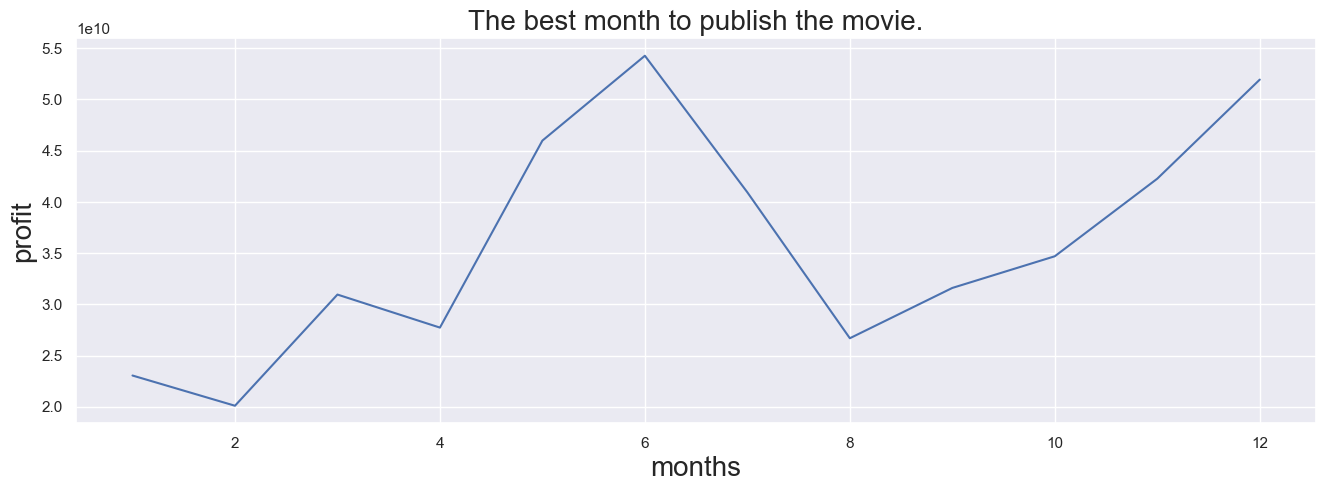

In [234]:
plt.figure(figsize=(16,5))
plt.plot(mo)
plt.xlabel('months', fontsize =20)
plt.ylabel('profit', fontsize = 20)
plt.title('The best month to publish the movie.',fontsize = 20)
plt.show()

In [235]:
# all monthes
mo


month
1     23047879284
2     20097198960
3     30948095072
4     27724574740
5     45974589470
6     54255297372
7     40925360347
8     26685428542
9     31594889601
10    34686650439
11    42257849808
12    51927217431
Name: profit, dtype: int64

In [236]:
#max month in profet 
mo.max()

54255297372

###  answer : the best month is 6 Us for profit

# what is average runtime of films?

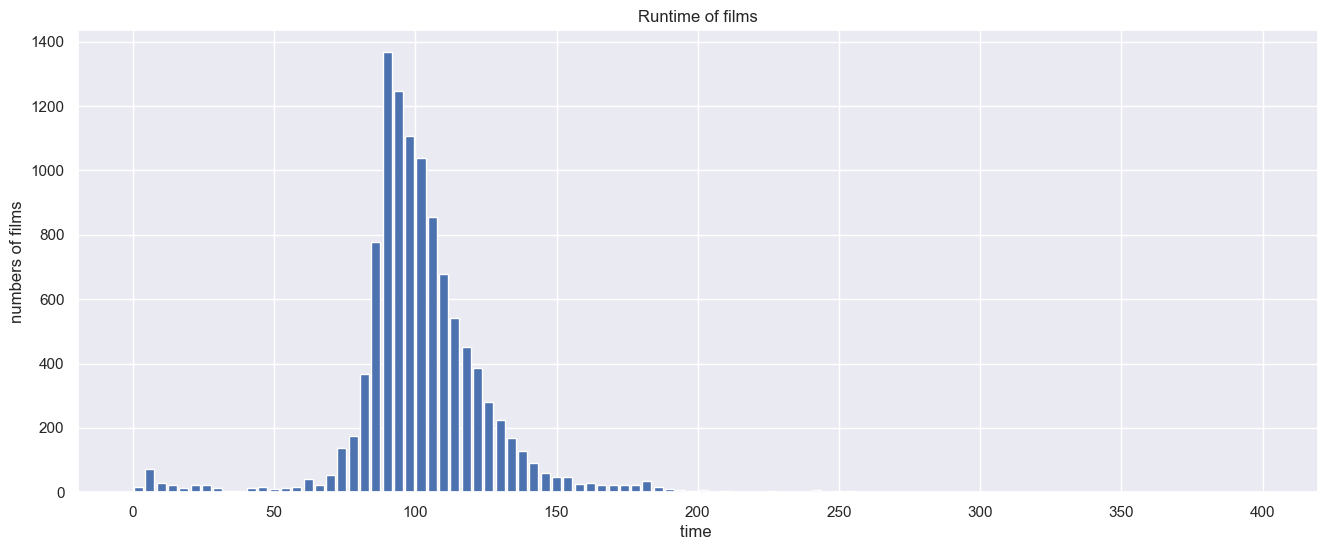

In [237]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
plt.figure(figsize=(16,6))
plt.hist(df['runtime'], rwidth = .8,bins=100,range=[0,400])
plt.xlabel('time ')
plt.ylabel('numbers of films')
plt.title('Runtime of films')
plt.show()

In [238]:
df['runtime'].mean()

102.36281638288081

## average runtime of films is 102 minutes

# Runtime describe

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


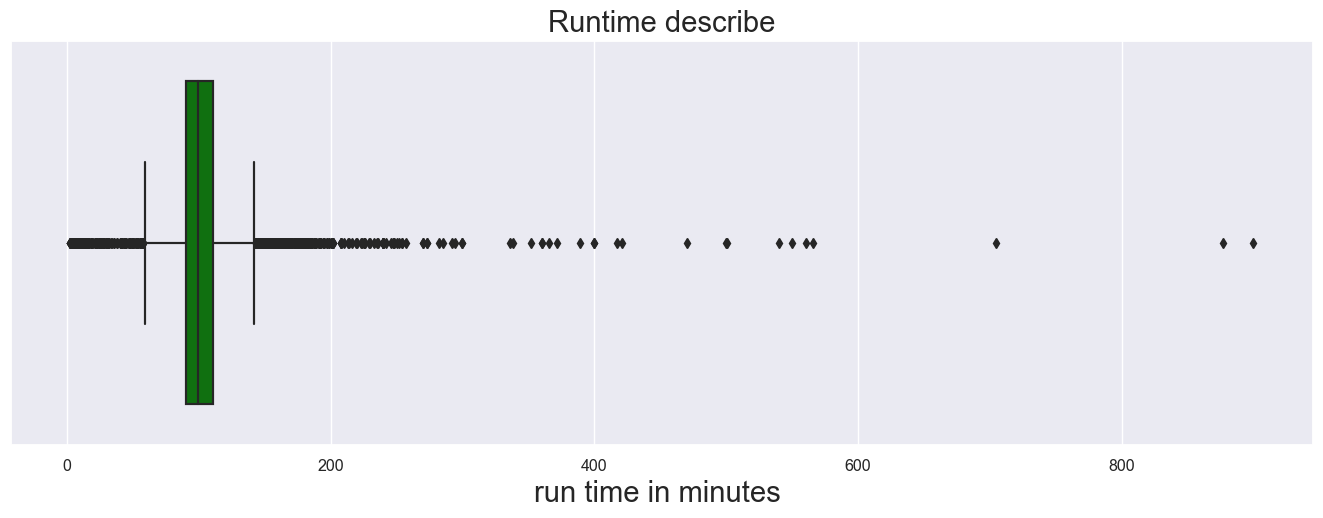

In [240]:
plt.figure(figsize=(16,5), dpi = 105)#using seaborn to generate the plot
sns.boxplot(df['runtime'], color = 'green')
plt.title('Runtime describe',fontsize =20)
plt.xlabel('run time in minutes ',fontsize =20)
plt.show()

In [241]:
df['runtime'].describe()

count    10865.000000
mean       102.362816
std         30.904045
min          2.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        900.000000
Name: runtime, dtype: float64

# what is the profits and budget for each year and what is the realtion between than ?!



In [244]:
# How much is the budget and profit over the years

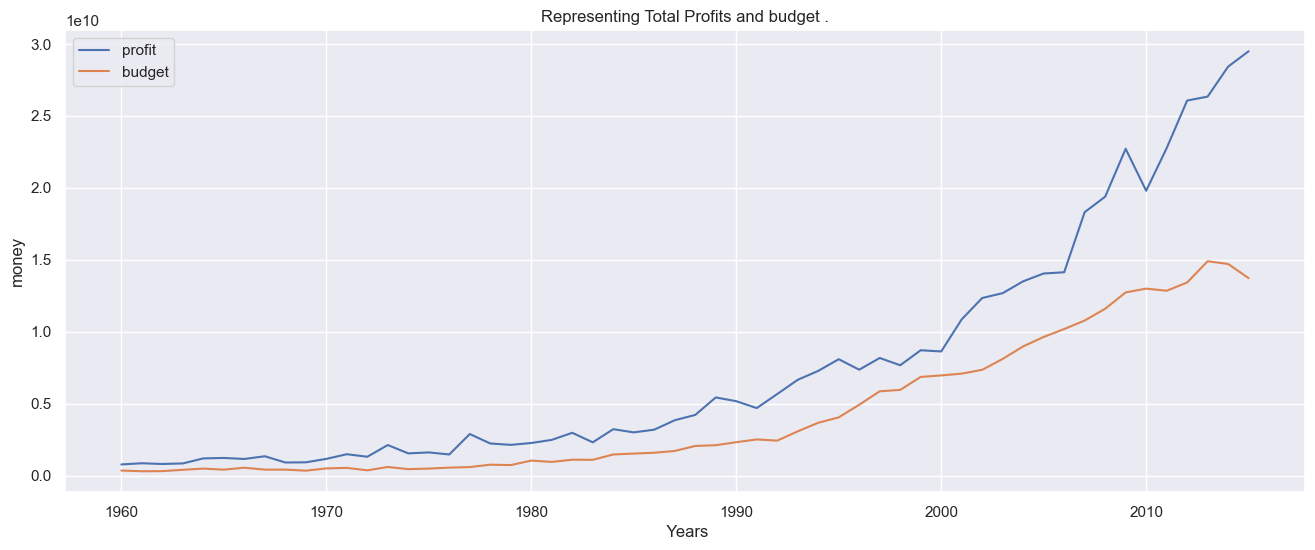

In [245]:
x = df.groupby('release_year')['profit'].sum()
y = df.groupby('release_year')['budget'].sum()
plt.figure(figsize=(16,6))

plt.xlabel(' Years', fontsize = 12)
plt.ylabel('money', fontsize = 12)
plt.title('Representing Total Profits and budget .')

plt.plot(x)
plt.plot(y)
plt.legend(['profit','budget'],loc='upper left')
#displaying the line plot
plt.show()
ww=df.corr()

## answer relation bettween profit vs budget

In [246]:
ww.loc['profit','budget']

0.5386629970420335

In [247]:
df.groupby('release_year')['profit'].value_counts()

release_year  profit     
1960           25202610      21
              -8624286        1
              -4624286        1
               2905000        1
               4100000        1
                             ..
2015           1082730962     1
               1125035767     1
               1316249360     1
               1363528810     1
               1868178225     1
Name: profit, Length: 5867, dtype: int64

In [248]:
df.groupby('release_year')['budget'].value_counts()

release_year  budget   
1960          14624286     23
              3000000       2
              30000         1
              200000        1
              270000        1
                           ..
2015          160000000     1
              176000003     1
              200000000     1
              245000000     1
              280000000     1
Name: budget, Length: 2669, dtype: int64

In [249]:
df

,profit,popularity,budget,revenue,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,year,month,day
0,1363528810,32.985763,150000000,1513528810,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,2015,6,9
1,228436354,28.419936,150000000,378436354,120,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2015,5,13
2,185238201,13.112507,110000000,295238201,119,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,2015,3,18
3,1868178225,11.173104,200000000,2068178225,136,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,2015,12,15
4,1316249360,9.335014,190000000,1506249360,137,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,2015,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,25202610,0.080598,14624286,39826896,95,6/15/66,11,7.4,1966,1.754989e+07,5.136900e+07,2066,6,15
10862,25202610,0.065543,14624286,39826896,176,12/21/66,20,5.7,1966,1.754989e+07,5.136900e+07,2066,12,21
10863,25202610,0.065141,14624286,39826896,94,1/1/66,11,6.5,1966,1.754989e+07,5.136900e+07,2066,1,1
10864,25202610,0.064317,14624286,39826896,80,11/2/66,22,5.4,1966,1.754989e+07,5.136900e+07,2066,11,2


 # Top 10 most profitable films?

In [250]:
top = df.sort_values(by=['profit'], ascending = False).head(10)

In [251]:
top

,profit,popularity,budget,revenue,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,year,month,day
1386,2544505847,9.432768,237000000,2781505847,162,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09,2009,12,10
3,1868178225,11.173104,200000000,2068178225,136,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,2015,12,15
5231,1645034188,4.355219,200000000,1845034188,194,11/18/97,4654,7.3,1997,2.716921e+08,2.506406e+09,1997,11,18
0,1363528810,32.985763,150000000,1513528810,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,2015,6,9
4,1316249360,9.335014,190000000,1506249360,137,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,2015,4,1
4361,1299557910,7.637767,220000000,1519557910,143,4/25/12,8903,7.3,2012,2.089437e+08,1.443191e+09,2012,4,25
3374,1202817822,5.711315,125000000,1327817822,130,7/7/11,3750,7.7,2011,1.211748e+08,1.287184e+09,2011,7,7
14,1125035767,5.944927,280000000,1405035767,141,4/22/15,4304,7.4,2015,2.575999e+08,1.292632e+09,2015,4,22
5422,1124219009,6.112766,150000000,1274219009,102,11/27/13,3369,7.5,2013,1.404050e+08,1.192711e+09,2013,11,27
8094,1084279658,1.136610,22000000,1106279658,114,7/28/95,201,5.6,1995,3.148127e+07,1.583050e+09,1995,7,28


# The relation betwen vote_average and popularity ?

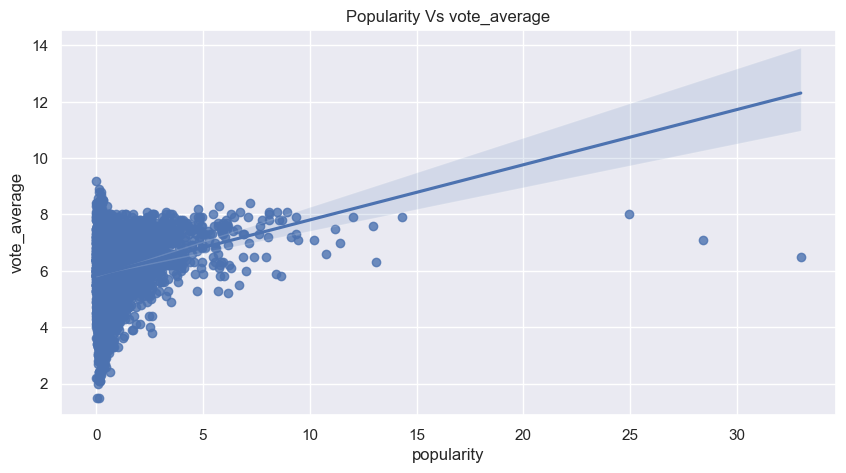

In [252]:
fig = sns.regplot(x=df['popularity'],y=df['vote_average'])
fig.set_title("Popularity Vs vote_average",fontsize = 12)
fig.set_xlabel("popularity",fontsize = 12)
fig.set_ylabel("vote_average",fontsize = 12)
sns.set(rc={'figure.figsize':(10,5)})
w=df.corr()

### relation between Popularity Vs vote_average =

In [253]:
w.loc['popularity','vote_average']

0.20951701409661333

# Relaction between Popularity and Profit?

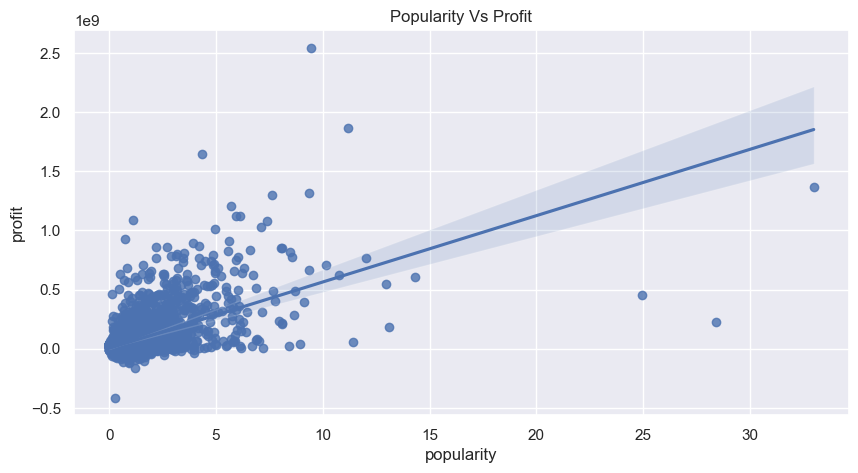

In [254]:
fig = sns.regplot(x=df['popularity'],y=df['profit'])
fig.set_title("Popularity Vs Profit",fontsize = 12)
fig.set_xlabel("popularity",fontsize = 12)
fig.set_ylabel("profit",fontsize = 12)
sns.set(rc={'figure.figsize':(10,5)})
q=df.corr()

# Relaction between Popularity and Profit =

In [255]:
q.loc['popularity','profit']

0.600406319093921

<a id='conclusions'></a>
## Conclusions

>

1)Average movie viewing time 102 minute 
2)The most profitable films are shown in the 6 month of the year
3)Relaction between Popularity and Profit =.6
4)relation between Popularity Vs vote_average =.209
5)relation bettween profit vs budget  =.538

# Limitations:

Moreover we are not sure if the data provided to us is completel corect and up-to-dateوbudget and revenue column do not have currency unit This is what makes there is in the big one in the profit account a currency difference competition. Printing currencies is much stronger than other currencies. If he left me that currency X is the dollar, and currency Y is the Japanese yen, then a big difference will arise in the profit after converting to one currency.
